# Olympics

This is a historical dataset on the modern Olympic Games, from Athens 1896 to Rio 2016. Each row consists of an individual athlete competing in an Olympic event and which medal was won (if any).

Not sure where to begin? Scroll to the bottom to find challenges!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:


data = pd.read_csv("data/athlete_events.csv.gz")

data.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


[Source](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) and [license](https://creativecommons.org/publicdomain/zero/1.0/) of the dataset.
The dataset is a consolidated version of data from www.sports-reference.com. 

## Data Validation

In [24]:
# create a copy of the data
valid_data = data.copy()

- Validate Sex column

In [25]:
# validate sex column
print(valid_data['sex'].unique())

# set data type to category
valid_data['sex'] = valid_data['sex'].astype('category')

['M' 'F']


- Validate Season column

In [26]:
# validate season column
print(valid_data['season'].unique())

# set data type to category
valid_data['season'] = valid_data['season'].astype('category')

['Summer' 'Winter']


- Validate Medal column

In [27]:
# validate medal column
print(valid_data['medal'].unique())


[nan 'Gold' 'Bronze' 'Silver']


- Validate Age column

In [28]:
valid_data['age'].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: age, dtype: float64

In [29]:
# print the sports for athletes with age higher than 60
print(valid_data[valid_data['age'] > 60]['sport'].unique())

['Art Competitions' 'Shooting' 'Sailing' 'Equestrianism' 'Fencing'
 'Archery' 'Roque']


_Everything make sense_

- Validate height column

In [30]:
# validate height column
valid_data['height'].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: height, dtype: float64

- Validate weight column

In [31]:
# validate weight column
valid_data['weight'].describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: weight, dtype: float64

## Data Cleaning

In [33]:
# make a copy of the  validated data
clean_data = valid_data.copy()

In [34]:
# delete duplicate rows
clean_data.drop_duplicates(inplace=True)


In [35]:
# check the shape of the data
print("the data has {} rows and {} columns".format(clean_data.shape[0], clean_data.shape[1]))

the data has 269731 rows and 15 columns


In [36]:
# check the number of unique values in id column
print("the data has {} unique Athlete".format(clean_data["id"].nunique()))

the data has 135571 unique Athlete


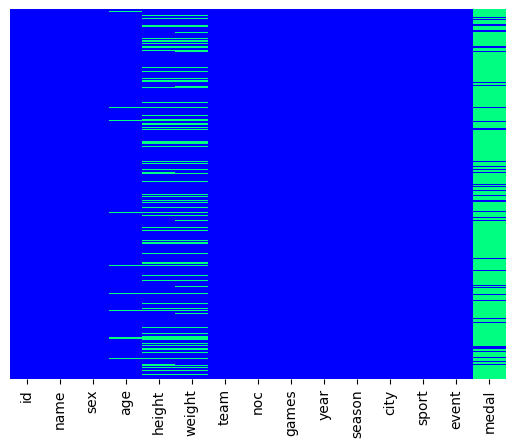

In [37]:
# plot number of missing values in each column
sns.heatmap(clean_data.isnull(), cbar=False, yticklabels=False, cmap="winter")
plt.show()

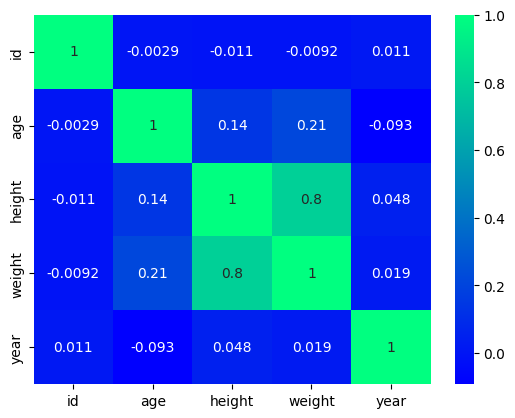

In [38]:
# correlation matrix
corr = clean_data.corr()

# plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="winter",
            annot=True)
plt.show()

- As Expected, the weight and height have a strong positive correlation:

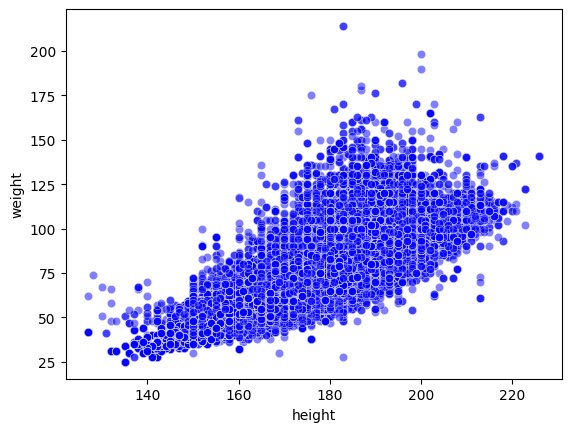

In [39]:
# plot height against weight
sns.scatterplot(x="height", y="weight", data=clean_data , color="blue", alpha=0.5)
plt.show()

**Filling missing Values in age, height and weight columns**

In [40]:
def fill_missing_values(df):
    """
    Fill missing values in a DataFrame by grouping the data by 'sport' and 'year' and filling with the median value.
    If the median value is not available for a particular sport and year combination, it will be filled with the median
    value for that sport across all years.

    Args:
        df: A pandas DataFrame containing the data to fill missing values in.

    Returns:
        A pandas DataFrame with missing values filled.
    """
    # Group the data by 'sport' and 'year'
    grouped = df.groupby(['sport', 'year'])

    # Fill missing values with the median for each group, if available
    filled = grouped.apply(lambda x: x.fillna(x.median()) if x.notnull().any().any() else x)

    # Fill remaining missing values with the median for each sport across all years
    filled = filled.fillna(filled.groupby('sport').transform('median'))
    
    # Fill any remaining missing values with the overall median
    filled = filled.fillna(filled.median())

    return filled


filled_data = fill_missing_values(clean_data)


- **Replace NaN values in medal column with "No Medal"**

In [41]:
# replace the missing values in the 'Medal' column with 'No Medal'
filled_data['medal'].fillna('No Medal', inplace=True)

In [42]:
# check for any missing values
filled_data.isna().any().any()

False

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: In which year and city did the Netherlands win the highest number of medals in their history?
- 📊 **Visualize**: Create a plot visualizing the relationship between the number of athletes countries send to an event and the number of medals they receive.
- 🔎 **Analyze**: In which sports does the height of an athlete increase their chances of earning a medal?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working as a data analyst for an international judo club. The owner of the club is looking for new ways to leverage data for competition. One idea they have had is to use past competition data to estimate the threat of future opponents. They have provided you with a dataset of past Olympic data and want to know whether you can use information such as the height, weight, age, and national origin of a judo competitor to estimate the probability that they will earn a medal.

You will need to prepare a report that is accessible to a broad audience. It should outline your steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._